<a href="https://colab.research.google.com/github/Tar-ive/ML-Stock-Prediction/blob/main/Stocks_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
!pip install pandas==1.4.2

In [8]:
!pip install google-cloud-bigquery

In [9]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix

import numpy as np

import matplotlib.pyplot as plt

from google.cloud import bigquery as bq
import tensorflow as tf

In [12]:
import yfinance as yf

In [13]:
ticker = 'NVDA'
data = yf.download(ticker, start="2020-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


In [15]:
data['Return'] = data['Close'].pct_change()
data.dropna(inplace=True)

In [16]:
data['Prev Return'] = data['Return'].shift(1)
data.dropna(inplace=True)

In [18]:
X = data[['Prev Return']]
y = (data['Return'] > 0).astype(int)

In [19]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [21]:
from tensorflow.keras import layers, models

In [22]:
model = models.Sequential([
    layers.Dense(10, activation='relu', input_shape=(1,)),
    layers.Dense(1, activation='sigmoid')
])


In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
26/26 [==============================] - 1s 3ms/step - loss: 0.6928 - accuracy: 0.5337
Epoch 2/10
26/26 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5387
Epoch 3/10
26/26 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5387
Epoch 4/10
26/26 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5387
Epoch 5/10
26/26 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5387
Epoch 6/10
26/26 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5387
Epoch 7/10
26/26 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.5387
Epoch 8/10
26/26 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5387
Epoch 9/10
26/26 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5387
Epoch 10/10
26/26 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5387


In [25]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.5572


[0.6879313588142395, 0.5572139024734497]

In [26]:
nvda_data = yf.download('NVDA', start='2018-01-01', end='2024-03-15')


[*********************100%%**********************]  1 of 1 completed


In [28]:
nvda_data.fillna(method='ffill', inplace=True)

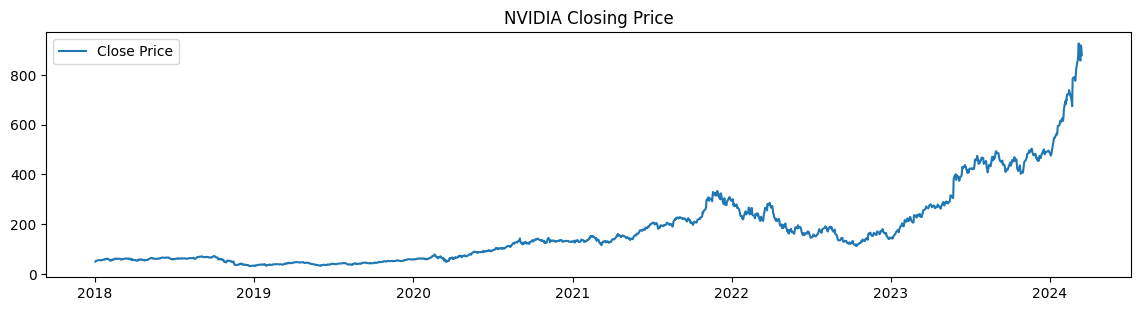

In [29]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(nvda_data['Close'], label='Close Price')
plt.title('NVIDIA Closing Price')
plt.legend()

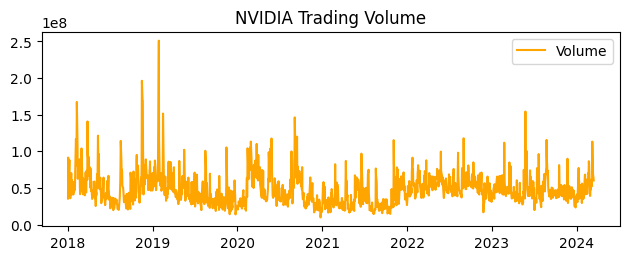

In [30]:
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(nvda_data['Volume'], label='Volume', color='orange')
plt.title('NVIDIA Trading Volume')
plt.legend()

plt.tight_layout()
plt.show()

In [32]:
!pip install talib

ERROR: Could not find a version that satisfies the requirement talib (from versions: none)
ERROR: No matching distribution found for talib


In [35]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2024-03-25 05:17:53--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-03-25 05:17:53--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-03-25 05:17:53--  http://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving newco

In [36]:
nvda_data['Previous Close'] = nvda_data['Close'].shift(1)
nvda_data['MA5'] = nvda_data['Close'].rolling(window=5).mean()
nvda_data['MA30'] = nvda_data['Close'].rolling(window=30).mean()
nvda_data['Price Change Percent'] = nvda_data['Close'].pct_change() * 100
nvda_data['Volume Change'] = nvda_data['Volume'].diff()
nvda_data['RSI'] = talib.RSI(nvda_data['Close'], timeperiod=14)
nvda_data['MACD'], nvda_data['MACD Signal'], _ = talib.MACD(nvda_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
nvda_data['Historical Volatility'] = nvda_data['Close'].pct_change().rolling(window=21).std() * np.sqrt(252) * 100


In [39]:
print(nvda_data.tail(15))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-02-23  807.900024  823.940002  775.700012  788.169983  788.132996   
2024-02-26  797.000000  806.460022  785.049988  790.919983  790.882874   
2024-02-27  793.809998  794.799988  771.619995  787.010010  786.973083   
2024-02-28  776.200012  789.330017  771.250000  776.630005  776.593567   
2024-02-29  790.940002  799.900024  783.500000  791.119995  791.082886   
2024-03-01  800.000000  823.000000  794.349976  822.789978  822.751404   
2024-03-04  841.299988  876.950012  837.190002  852.369995  852.330017   
2024-03-05  852.700012  860.969971  834.169983  859.640015  859.640015   
2024-03-06  880.219971  897.239990  870.299988  887.000000  887.000000   
2024-03-07  901.580017  927.669983  896.020020  926.690002  926.690002   
2024-03-08  951.380005  974.000000  865.059998  875.280029  875.280029   
2024-03-11  864.289978  887.969971  84

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
nvda_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Previous Close',
       'MA5', 'MA30', 'Price Change Percent', 'Volume Change', 'RSI', 'MACD',
       'MACD Signal', 'Historical Volatility'],
      dtype='object')

In [42]:
df= nvda_data

In [44]:
df['Next Close'] = df['Close'].shift(-1)

# Create the 'Target' column, where 1 indicates the next day's close is higher than the current day's
df['Target'] = (df['Next Close'] > df['Close']).astype(int)

# Drop the 'Next Close' column as it's no longer needed
df.drop('Next Close', axis=1, inplace=True)

In [45]:
X = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Previous Close',
        'MA5', 'MA30', 'Price Change Percent', 'Volume Change', 'RSI', 'MACD',
        'MACD Signal', 'Historical Volatility']]
y = df['Target']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Checking for any NaN values in the dataset
print(X_train.isnull().sum())

# Normalizing the dataset if not already done
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Open                      0
High                      0
Low                       0
Close                     0
Adj Close                 0
Volume                    0
Previous Close            1
MA5                       4
MA30                     27
Price Change Percent      1
Volume Change             1
RSI                      14
MACD                     28
MACD Signal              28
Historical Volatility    20
dtype: int64


In [52]:
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate as needed

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [56]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/50
32/32 - 2s - loss: nan - accuracy: 0.4539 - val_loss: nan - val_accuracy: 0.4440 - 2s/epoch - 76ms/step
Epoch 2/50
32/32 - 0s - loss: nan - accuracy: 0.4539 - val_loss: nan - val_accuracy: 0.4440 - 316ms/epoch - 10ms/step
Epoch 3/50
32/32 - 0s - loss: nan - accuracy: 0.4539 - val_loss: nan - val_accuracy: 0.4440 - 293ms/epoch - 9ms/step
Epoch 4/50
32/32 - 0s - loss: nan - accuracy: 0.4539 - val_loss: nan - val_accuracy: 0.4440 - 425ms/epoch - 13ms/step
Epoch 5/50
32/32 - 0s - loss: nan - accuracy: 0.4539 - val_loss: nan - val_accuracy: 0.4440 - 359ms/epoch - 11ms/step
Epoch 6/50
32/32 - 0s - loss: nan - accuracy: 0.4539 - val_loss: nan - val_accuracy: 0.4440 - 159ms/epoch - 5ms/step
Epoch 7/50
32/32 - 0s - loss: nan - accuracy: 0.4539 - val_loss: nan - val_accuracy: 0.4440 - 142ms/epoch - 4ms/step
Epoch 8/50
32/32 - 0s - loss: nan - accuracy: 0.4539 - val_loss: nan - val_accuracy: 0.4440 - 151ms/epoch - 5ms/step
Epoch 9/50
32/32 - 0s - loss: nan - accuracy: 0.4539 - val_loss

In [57]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

10/10 - 0s - loss: nan - accuracy: 0.4936 - 52ms/epoch - 5ms/step
Test accuracy: 0.49358972907066345


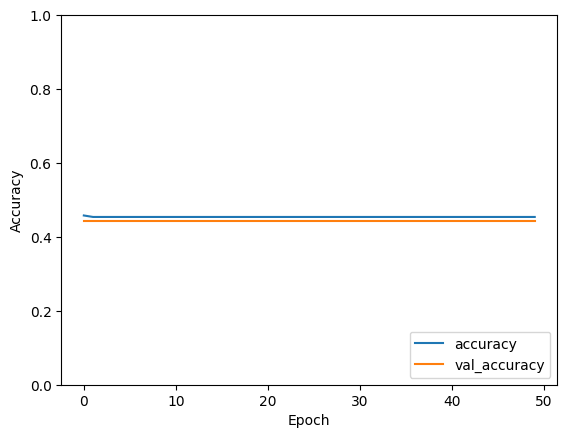

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')